# [NTDS'19] assignment 1: network science
[ntds'19]: https://github.com/mdeff/ntds_2019

[Eda Bayram](https://lts4.epfl.ch/bayram), [EPFL LTS4](https://lts4.epfl.ch) and
[Nikolaos Karalias](https://people.epfl.ch/nikolaos.karalias), [EPFL LTS2](https://lts2.epfl.ch).

## Students

* Team: 8
* Students: Ariel Alba, Andres Montero, Elias Poroma and Adrian Villarroel

## Rules

Grading:
* The first deadline is for individual submissions. The second deadline is for the team submission.
* All team members will receive the same grade based on the team solution submitted on the second deadline.
* As a fallback, a team can ask for individual grading. In that case, solutions submitted on the first deadline are graded.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

Submission:
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter.

## Objective

The purpose of this milestone is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you will analyze the network properties. In the second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

## Cora Dataset

The [Cora dataset](https://linqs.soe.ucsc.edu/node/236) consists of scientific publications classified into one of seven research fields. 

* **Citation graph:** the citation network can be constructed from the connections given in the `cora.cites` file.
* **Feature graph:** each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary and its research field, given in the `cora.content` file. The dictionary consists of 1433 unique words. A feature graph can be constructed using the Euclidean distance between the feature vector of the publications.

The [`README`](data/cora/README) provides details about the content of [`cora.cites`](data/cora/cora.cites) and [`cora.content`](data/cora/cora.content).

## Section 1: Network Properties

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### Question 1: Construct a Citation Graph and a Feature Graph

Read the `cora.content` file into a Pandas DataFrame by setting a header for the column names. Check the `README` file.

In [2]:
DATA_PATH = "data"

In [3]:
# Your code here
column_list = (
    ["paper_id"] + ["w" + str(x) for x in range(1,1434)] + ["class_label"]
) 
pd_content = pd.read_csv(DATA_PATH + "/cora/cora.content", 
                         delimiter="\t",
                         names=column_list) 
pd_content.head()

,paper_id,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,w1433,class_label
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


Print out the number of papers contained in each of the reasearch fields.

**Hint:** You can use the `value_counts()` function.

In [4]:
# Your code here
pd.value_counts(pd_content["class_label"]) 

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: class_label, dtype: int64

Select all papers from a field of your choice and store their feature vectors into a NumPy array.
Check its shape.

In [5]:
# Your code here
my_field = "Neural_Networks" 
features = (
    pd_content[pd_content["class_label"] == my_field]
    .iloc[:, 1: pd_content.shape[1] - 1]
    .values
)
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
features.shape

(818, 1433)

Let $D$ be the Euclidean distance matrix whose $(i,j)$ entry corresponds to the Euclidean distance between feature vectors $i$ and $j$.
Using the feature vectors of the papers from the field which you have selected, construct $D$ as a Numpy array. 

In [7]:
# With this test we can verify numpy broadcast for Euclidean distance
v1 = np.asarray([2,1,3])
v2 = np.asarray([6,5,7])
v3 = np.asarray([2,3,4])
mat = np.asarray([v1,v2,v3])
print("Matrix")
print(mat)
d_mat = np.linalg.norm(mat - mat[:, np.newaxis, :], axis=2)
print("Distance matrix")
print(d_mat)
print("Individual vector Euclidean distance")
print(np.linalg.norm(v1 - v2))
print(np.linalg.norm(v1 - v3))
print(np.linalg.norm(v2 - v3))

Matrix
[[2 1 3]
 [6 5 7]
 [2 3 4]]
Distance matrix
[[0.         6.92820323 2.23606798]
 [6.92820323 0.         5.38516481]
 [2.23606798 5.38516481 0.        ]]
Individual vector Euclidean distance
6.928203230275509
2.23606797749979
5.385164807134504


In [8]:
# Your code here
distance_matrix = np.linalg.norm(features - features[:, np.newaxis, :], 
                                 axis=2) 
distance_matrix.shape

(818, 818)

Check the mean pairwise distance $\mathbb{E}[D]$.

In [9]:
mean_distance = distance_matrix.mean()
mean_distance

5.689638434824233

Plot an histogram of the euclidean distances.

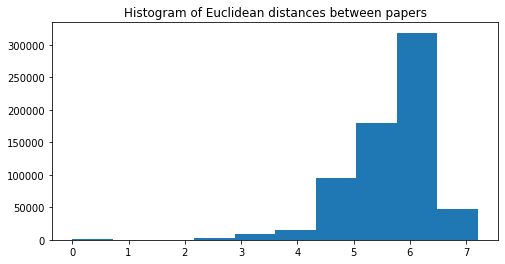

In [10]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between papers")
plt.hist(distance_matrix.flatten());

Now create an adjacency matrix for the papers by thresholding the Euclidean distance matrix.
The resulting (unweighted) adjacency matrix should have entries
$$ A_{ij} = \begin{cases} 1, \; \text{if} \; d(i,j)< \mathbb{E}[D], \; i \neq j, \\ 0, \; \text{otherwise.} \end{cases} $$

First, let us choose the mean distance as the threshold.

In [11]:
threshold = mean_distance
# Your code here
A_feature = (
    np.where(distance_matrix < threshold, 1, 0) 
    - 
    np.eye(distance_matrix.shape[0])
)
A_feature

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

Now read the `cora.cites` file and construct the citation graph by converting the given citation connections into an adjacency matrix.

In [12]:
# Your code here
cora_cites = np.genfromtxt(DATA_PATH + "/cora/cora.cites",
                           delimiter="\t")

index = np.vectorize(dict(zip(pd_content["paper_id"], 
                              pd_content["paper_id"].index)).get)(cora_cites) 
A_citation = np.zeros((pd_content.shape[0], pd_content.shape[0]))
A_citation[index[:, 0],index[:, 1]] = 1
A_citation.shape

(2708, 2708)

Get the adjacency matrix of the citation graph for the field that you chose.
You have to appropriately reduce the adjacency matrix of the citation graph.

In [13]:
# Test np.ix_()
a = np.asarray([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])
b = a[np.ix_(np.asarray([1, 3]),np.asarray([0, 3]))]
b

array([[ 5,  8],
       [13, 16]])

In [14]:
# Your code here
my_f_index = (
    pd_content[pd_content["class_label"] == my_field]
    .index
    .values
    .astype(np.intp)
)
A_citation = A_citation[np.ix_(my_f_index, my_f_index)]
A_citation.shape

(818, 818)

Check if your adjacency matrix is symmetric. Symmetrize your final adjacency matrix if it's not already symmetric.

In [15]:
# To check if symmetric since it is an unweighted graph
np.all(A_citation - A_citation.T == 0)

False

In [16]:
# Your code here
# Symmetrization
A_citation = np.where((A_citation + A_citation.T) > 0, 1, 0) 
# A_citation = A_citation.T@A_citation
np.count_nonzero(A_citation - A_citation.T)

0

In [17]:
# Check values from citation matrix
np.unique(A_citation)

array([0, 1])

Check the shape of your adjacency matrix again.

In [18]:
A_citation.shape

(818, 818)

### Question 2: Degree Distribution and Moments

What is the total number of edges in each graph?

In [19]:
# Your code here
num_edges_feature = np.sum(A_feature) / 2 # Undirected graph
num_edges_citation = np.sum(A_citation) # Directed graph
print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 136771.0
Number of edges in the citation graph: 2350


Plot the degree distribution histogram for each of the graphs.

In [20]:
# Show degree calculation simple example
test_a_citation = np.asarray([[0, 1, 1], [0, 0, 1], [1, 0, 0]])
print(test_a_citation)
print("K_out = " + str(np.sum(test_a_citation, axis=1)))
print("K_in = " + str(np.sum(test_a_citation, axis=0)))
print("K = " + str(np.sum(test_a_citation, axis=0) + 
                   np.sum(test_a_citation, axis=1)))

[[0 1 1]
 [0 0 1]
 [1 0 0]]
K_out = [2 1 1]
K_in = [1 1 2]
K = [3 2 3]


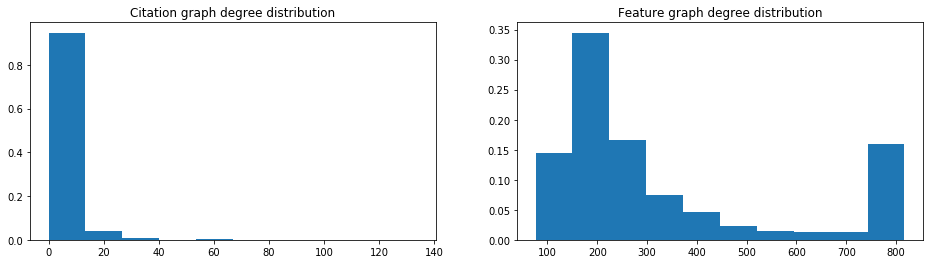

In [21]:
# Your code here
degrees_citation = ( # It is directed
    np.sum(A_citation, axis=0) +np.sum(A_citation, axis=1)
) 
degrees_feature = np.sum(A_feature, axis=0) # It is undirected

deg_hist_normalization = (
    np.ones(degrees_citation.shape[0]) / degrees_citation.shape[0]
)

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title("Citation graph degree distribution")
axes[0].hist(degrees_citation, weights=deg_hist_normalization);
axes[1].set_title("Feature graph degree distribution")
axes[1].hist(degrees_feature, weights=deg_hist_normalization);

Calculate the first and second moments of the degree distribution of each graph.

In [22]:
# Your code here
cit_moment_1 = np.mean(degrees_citation)
cit_moment_2 = np.var(degrees_citation)

feat_moment_1 = np.mean(degrees_feature)
feat_moment_2 = np.var(degrees_feature)

print(f"1st moment of citation graph: {cit_moment_1}") 
print(f"2nd moment of citation graph: {cit_moment_2}") 
print(f"1st moment of feature graph: {feat_moment_1}") 
print(f"2nd moment of feature graph: {feat_moment_2}") 

1st moment of citation graph: 5.745721271393643
2nd moment of citation graph: 62.047811765831135
1st moment of feature graph: 334.4034229828851
2nd moment of feature graph: 55375.54874133943


What information do the moments provide you about the graphs?
Explain the differences in moments between graphs by comparing their degree distributions.

**Your answer here:** The first moment is the average number of nodes connected to a node and the second moment is the variance. The citation degree distribution has all of its points concentrated in the range 0-6.5, that is why the average and the variance are low, whereas points of the feature distribution are distributed in the range 100-800 and highly concentrated in the range 100-300 resulting in a higher average and variance.

Select the 20 largest hubs for each of the graphs and remove them. Observe the sparsity pattern of the adjacency matrices of the citation and feature graphs before and after such a reduction.

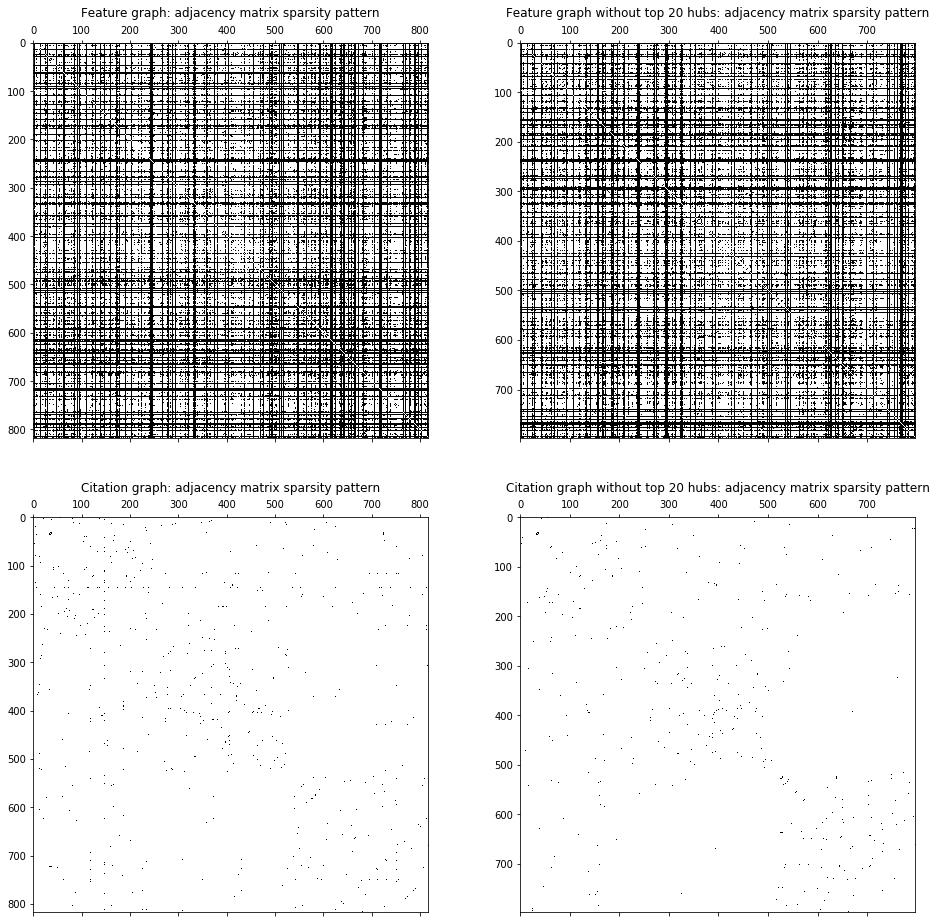

In [23]:
# Your code here
n = 20
index_hubs_A_feature = (-degrees_feature).argsort()[:n]
index_hubs_A_citation = (-degrees_citation).argsort()[:n]
reduced_A_feature = np.delete(np.delete(A_feature, 
                                        index_hubs_A_feature, 
                                        axis=0), 
                              index_hubs_A_feature,
                              axis=1)
reduced_A_citation = np.delete(np.delete(A_citation,
                                         index_hubs_A_citation,
                                         axis = 0),
                               index_hubs_A_citation, 
                               axis=1)

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].set_title(
    "Feature graph: adjacency matrix sparsity pattern"
)
axes[0, 0].spy(A_feature);
axes[0, 1].set_title(
    "Feature graph without top 20 hubs: adjacency matrix sparsity pattern"
)
axes[0, 1].spy(reduced_A_feature);
axes[1, 0].set_title(
    "Citation graph: adjacency matrix sparsity pattern"
)
axes[1, 0].spy(A_citation);
axes[1, 1].set_title(
    "Citation graph without top 20 hubs: adjacency matrix sparsity pattern"
)
axes[1, 1].spy(reduced_A_citation);

Plot the new degree distribution histograms.

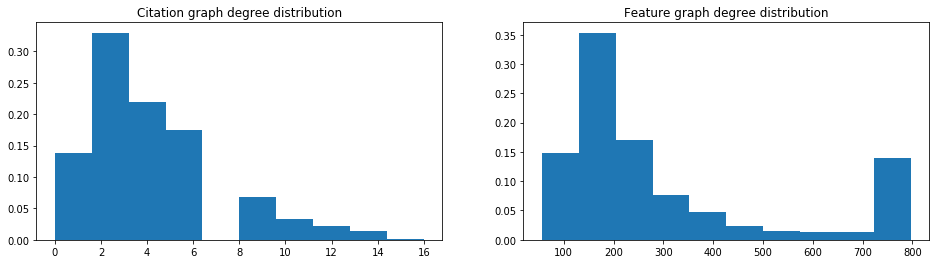

In [24]:
# Your code here
reduced_degrees_feat = np.sum(reduced_A_feature, axis=0) 
reduced_degrees_cit = (
    np.sum(reduced_A_citation, axis=0) 
    + 
    np.sum(reduced_A_citation, axis=1)
)

deg_hist_normalization = (
    np.ones(reduced_degrees_feat.shape[0])
    /
    reduced_degrees_feat.shape[0]
)

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title("Citation graph degree distribution")
axes[0].hist(reduced_degrees_cit, weights=deg_hist_normalization);
axes[1].set_title("Feature graph degree distribution")
axes[1].hist(reduced_degrees_feat, weights=deg_hist_normalization);

Compute the first and second moments for the new graphs.

In [25]:
# Your code here
reduced_cit_moment_1 = np.mean(reduced_degrees_cit) 
reduced_cit_moment_2 = np.var(reduced_degrees_cit)

reduced_feat_moment_1 = np.mean(reduced_degrees_feat) 
reduced_feat_moment_2 = np.var(reduced_degrees_feat)

print("Citation graph first moment:", reduced_cit_moment_1)
print("Citation graph second moment:", reduced_cit_moment_2)
print("Feature graph first moment: ", reduced_feat_moment_1)
print("Feature graph second moment: ", reduced_feat_moment_2)

Citation graph first moment: 3.944862155388471
Citation graph second moment: 9.520769341901119
Feature graph first moment:  302.30827067669173
Feature graph second moment:  50780.035295004425


Print the number of edges in the reduced graphs.

In [26]:
# Your code here
reduced_num_edges_feature = np.sum(reduced_A_feature) / 2. # It is undirected
reduced_num_edges_citation = np.sum(reduced_A_citation) # It is directed
print(
    f"Number of edges in the reduced feature graph: {reduced_num_edges_feature}"
)
print(
    f"Number of edges in the reduced citation graph: {reduced_num_edges_citation}"
)

Number of edges in the reduced feature graph: 120621.0
Number of edges in the reduced citation graph: 1574


Is the effect of removing the hubs the same for both networks? Look at the percentage changes for each moment. Which of the moments is affected the most and in which graph? Explain why.  

**Hint:** Examine the degree distributions.

**Your answer here:** The effect is larger for the citation network because it has few nodes that have a degree significantly larger from the average (hubs). The second moment in the citation graph is affected the most because, according to the degree distribution, there was a small portion of nodes having degrees higher than 8 which accounted for most of the variance.

In [27]:
# Your code here
delta_cit_moment_1 = (
    (cit_moment_1 - reduced_cit_moment_1) * 100 / cit_moment_1
)
delta_cit_moment_2 = (
    (cit_moment_2 - reduced_cit_moment_2) * 100 / cit_moment_2
)

delta_feat_moment_1 = (
    (feat_moment_1 - reduced_feat_moment_1) * 100 / feat_moment_1
)
delta_feat_moment_2 = (
    (feat_moment_2 - reduced_feat_moment_2) * 100 / feat_moment_2
)

print(
    f"Citation moment 1 percentage change: {delta_cit_moment_1} %" 
)
print(
    f"Feature moment 1 percentage change: {delta_feat_moment_1} %"
)
print(
    f"Citation moment 2 percentage change: {delta_cit_moment_2} %"
)
print(
    f"Feature moment 2 percentage change: {delta_feat_moment_2} %"
)

Citation moment 1 percentage change: 31.34261184877087 %
Feature moment 1 percentage change: 9.597734383190213 %
Citation moment 2 percentage change: 84.65575324745929 %
Feature moment 2 percentage change: 8.29881337664167 %


### Question 3: Pruning, sparsity, paths

By adjusting the threshold of the euclidean distance matrix, prune the feature graph so that its number of edges is roughly close (within a hundred edges) to the number of edges in the citation graph.

In [28]:
# Your code here
mean_distance = distance_matrix.mean()

# We take the new treshold as mean_distance*0.5
threshold = mean_distance * 0.5

# We create the A feature pruned with the new treshhold
A_feature_pruned = (
    np.where(distance_matrix < threshold, 1, 0)
    -
    np.eye(distance_matrix.shape[0])
)

# The number of edges is equal to the total values of the matrix /2 ,
# is an undirected graph
num_edges_feature_pruned = 0.5 * np.sum(A_feature_pruned)

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the feature graph after pruning: {num_edges_feature_pruned}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 136771.0
Number of edges in the feature graph after pruning: 1386.0
Number of edges in the citation graph: 2350


Check your results by comparing the sparsity patterns and total number of edges between the graphs.

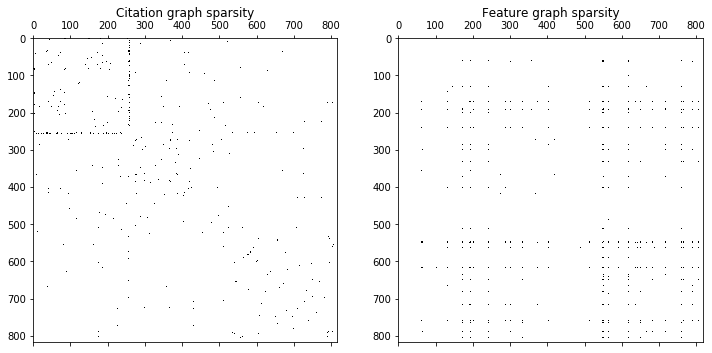

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title("Citation graph sparsity")
axes[0].spy(A_citation);
axes[1].set_title("Feature graph sparsity")
axes[1].spy(A_feature_pruned);

Let $C_{k}(i,j)$ denote the number of paths of length $k$ from node $i$ to node $j$. 

We define the path matrix $P$, with entries
$ P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j). $

Calculate the path matrices for both the citation and the unpruned feature graphs for $N =10$.  

**Hint:** Use [powers of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers).

In [30]:
A_citation.shape
path_matrix_citation = np.zeros((818, 818))

In [31]:
# Your code here.
path_matrix_citation = np.zeros((818, 818))
path_matrix_feature = np.zeros((818, 818))

for i in range(10 + 1):
    path_matrix_citation += np.linalg.matrix_power(A_citation, i)
    path_matrix_feature += np.linalg.matrix_power(A_feature, i)
    

Check the sparsity pattern for both of path matrices.

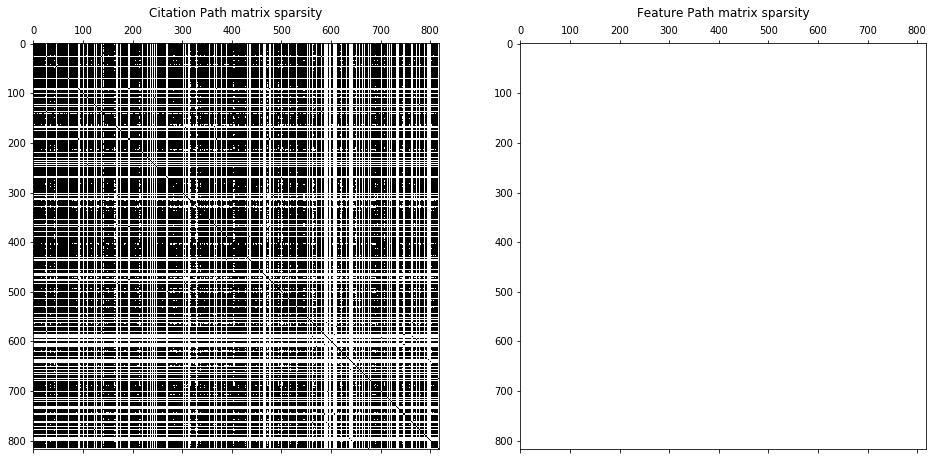

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title("Citation Path matrix sparsity")
axes[0].spy(path_matrix_citation);
axes[1].set_title("Feature Path matrix sparsity")
axes[1].spy(path_matrix_feature);

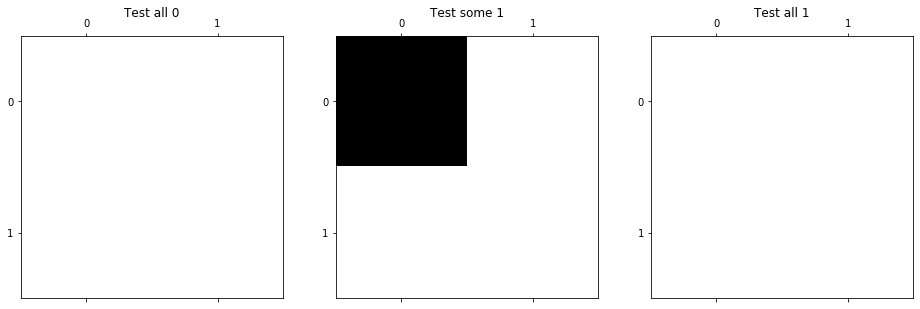

In [33]:
test_0 = [[0, 0], [0, 0]]
test_1 = [[1, 0], [0, 0]]
test_2 = [[1, 1], [1, 1]]

fig, axes = plt.subplots(1, 3, figsize=(16, 9))
axes[0].set_title("Test all 0")
axes[0].spy(test_0);
axes[1].set_title("Test some 1")
axes[1].spy(test_1);
axes[2].set_title("Test all 1")
axes[2].spy(test_2);

As we can observe, .spy() plot blank for all zeros or all 1 matrix, so to verify we check the min value of the path_matrix_feature and if the value is greater than 0 we conclude that the graph is fully connected

In [34]:
path_matrix_feature.min()

2.8054860716638497e+22

Now calculate the path matrix of the pruned feature graph for $N=10$. Plot the corresponding sparsity pattern. Is there any difference?

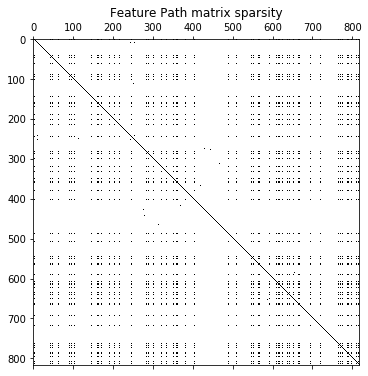

In [35]:
# Your code here
path_matrix_pruned = np.linalg.matrix_power(A_feature_pruned, 10)
for i in range(10 + 1):
    path_matrix_pruned += np.linalg.matrix_power(A_feature_pruned, i)
plt.figure(figsize=(12, 6))
plt.title("Feature Path matrix sparsity")
plt.spy(path_matrix_pruned);

**Your answer here:**

Describe how you can use the above process of counting paths to determine whether a graph is connected or not. Is the original (unpruned) feature graph connected?

For a graph to be connected, all the pairs of vertices need to be connected, by taking the Adjancecy matrix to the power, we will get a non-zero value only if both entries are non_zero, meaning the i,j value of the matrix are connected. 
With this explanation we can conclude that feature graph unpruned is connected becausee all the i,j are connected 

**Your answer here:** 

If the graph is connected, how can you guess its diameter using the path matrix?

We can find the diameter of the graph when A^k has non-zero values, meaning that all the paths are connected up until k (I+ A^1,....+ A^k), therefore the diameter is k

**Your answer here:**

If any of your graphs is connected, calculate the diameter using that process.

In [36]:
def find_diameter(matrix):
    """Function to calculate the diameter of a graph,
    Diameter = I + A^1 + .... + A^k up until there are no 0, 
    meaning every vertex connects with every vertex for distance K
    
    Args:
        matrix: Path matrix to find the diameter of the network
    
    Returns:
        i (int): Diameter of the matrix
    """
    degree = 0
    path_matrix = np.zeros(matrix.shape)
    i=0
    path_matrix += np.linalg.matrix_power(matrix,i)
    while 0 in path_matrix:
        i += 1
        path_matrix += np.linalg.matrix_power(matrix,i)
        
        if i > 20:
            print("infinite graph!")
            return "infinite"
    return i


In [37]:
# Your code here
diameter = find_diameter(A_feature)
print(f"The diameter is: {diameter}")

The diameter is: 2


Check if your guess was correct using [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html).
Note: usage of NetworkX is only allowed in this part of Section 1.

In [38]:
import networkx as nx

feature_graph = nx.from_numpy_matrix(A_feature)
print(f"Diameter according to networkx: {nx.diameter(feature_graph)}")

Diameter according to networkx: 2


## Section 2: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below.

In [39]:
import networkx as nx

Let us create NetworkX graph objects from the adjacency matrices computed in the previous section.

In [40]:
G_citation = nx.from_numpy_matrix(A_citation)
print(
    "Number of nodes: {}, Number of edges: {}"
    .format(G_citation.number_of_nodes(),
            G_citation.number_of_edges())
)
print(
    "Number of self-loops: {}, Number of connected components: {}".
    format(G_citation.number_of_selfloops(),
           nx.number_connected_components(G_citation))
)

Number of nodes: 818, Number of edges: 1175
Number of self-loops: 0, Number of connected components: 104


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [41]:
G_feature = nx.from_numpy_matrix(A_feature_pruned)
print(
    "Number of nodes: {}, Number of edges: {}".
    format(G_feature.number_of_nodes(),
           G_feature.number_of_edges())
)
print(
    "Number of self-loops: {}, Number of connected components: {}"
    .format(G_feature.number_of_selfloops(),
            nx.number_connected_components(G_feature))
)

Number of nodes: 818, Number of edges: 1386
Number of self-loops: 0, Number of connected components: 684


### Question 4: Simulation with Erdős–Rényi and Barabási–Albert models

Create an Erdős–Rényi and a Barabási–Albert graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [42]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

818

The number of match shall fit the average of the number of edges in the citation and the feature graph.

In [43]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

1280.0

How do you determine the probability parameter for the Erdős–Rényi graph?

**Your answer here:**

In [44]:
l_max = n * (n - 1) / 2
p = m / l_max
G_er = nx.erdos_renyi_graph(n, p)

Check the number of edges in the Erdős–Rényi graph.

In [45]:
print(
    "My Erdos-Rényi network has {} edges."
    .format(G_er.size())
)

My Erdos-Rényi network has 1285 edges.


The expected number of edges is $$E[m]=pn(n-1)/2$$ thus, to calculate the probability parameter $$p$$ 
first the maximum number of edges must be calculated $$n(n-1)/2$$ and since $$E[m]$$ is the average number 
of edges, the average number of edges must be divided by the theoretical maximum number of edges.

How do you determine the preferential attachment parameter for Barabási–Albert graphs?

**Your answer here:**

In [46]:
res1 = int((n + np.sqrt(n ** 2 - 4 * m)) / 2)
res2 = int((n - np.sqrt(n ** 2 - 4 * m)) / 2)
# Taking the max because q must be greater than 1 and 
# int() becuase it has to be a natural number
q = max(res1, res2)
G_ba = nx.barabasi_albert_graph(n, q)

Check the number of edges in the Barabási–Albert graph.

In [47]:
print(
    "My Barabási-Albert network has {} edges."
    .format(G_ba.size())
)

My Barabási-Albert network has 1632 edges.


The expected number of edges is $$m=q(n-q)$$, thus, to calculate the preferential attachment parameter $$q$$, 
the previous equation must be solved and like $$q > 1 \land q \in \mathbb{N}$$, the maximum value of the result of 
the equation is taken.

### Question 5: Giant Component

Check the size of the largest connected component in the citation and feature graphs.

In [48]:
giant_citation = max(nx.connected_component_subgraphs(G_citation),
                     key=len)
print(
    "The giant component of the citation graph has {} nodes and {} edges."
    .format(giant_citation.number_of_nodes(), giant_citation.size())
)

The giant component of the citation graph has 636 nodes and 1079 edges.


In [49]:
giant_feature = max(nx.connected_component_subgraphs(G_feature),
                    key=len)
print(
    "The giant component of the feature graph has {} nodes and {} edges."
    .format(giant_feature.number_of_nodes(), giant_feature.size())
)

The giant component of the feature graph has 117 nodes and 1364 edges.


Check the size of the giant components in the generated Erdős–Rényi graph.

In [50]:
giant_er = max(nx.connected_component_subgraphs(G_er), key=len)
print("The giant component of the Erdos-Rényi network has {} nodes and {} edges.".format(giant_er.number_of_nodes(), giant_er.size()))

The giant component of the Erdos-Rényi network has 782 nodes and 1282 edges.


Let us match the number of nodes in the giant component of the feature graph by simulating a new Erdős–Rényi network.
How do you choose the probability parameter this time? 

**Hint:** Recall the expected giant component size from the lectures.

**Your answer here:**

In [51]:
n_new = len(G_feature.nodes())
n_g = len(giant_feature.nodes())
p_new = -np.log(1 - n_g / n_new) * n_new / (n_g * (n_new - 1))
G_er_new = nx.erdos_renyi_graph(n_new, p_new)

Check the size of the new Erdős–Rényi network and its giant component.

In [52]:
print("My new Erdos Renyi network has {} edges.".format(G_er_new.size()))
giant_er_new = max(nx.connected_component_subgraphs(G_er_new), key=len)
print("The giant component of the new Erdos-Rényi network has {} nodes and {} edges.".format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network has 440 edges.
The giant component of the new Erdos-Rényi network has 147 nodes and 147 edges.


### Question 6: Degree Distributions

Recall the degree distribution of the citation and the feature graph.

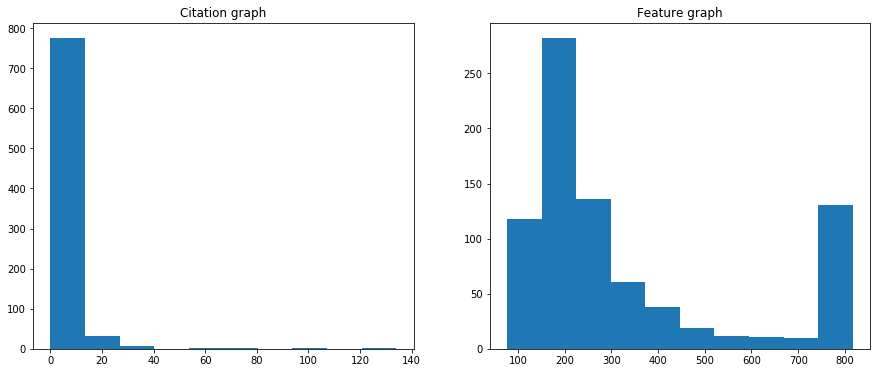

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Citation graph")
citation_degrees = (
    (np.sum(A_citation, axis=0) 
     + 
     np.sum(A_citation,axis = 1)).astype(int)
)
axes[0].hist(citation_degrees);
axes[1].set_title("Feature graph")
feature_degrees = np.sum(A_feature, axis=0).astype(int)
axes[1].hist(feature_degrees);

What does the degree distribution tell us about a network? Can you make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions?

**Your answer here:** The degree distribution helps us get an idea of the degrees in the network and allows us to guess the network model type. In this example, the citation has a scale free network type of distribution, and the feature graph looks like an exponentially bounded network.

Now, plot the degree distribution historgrams for the simulated networks.

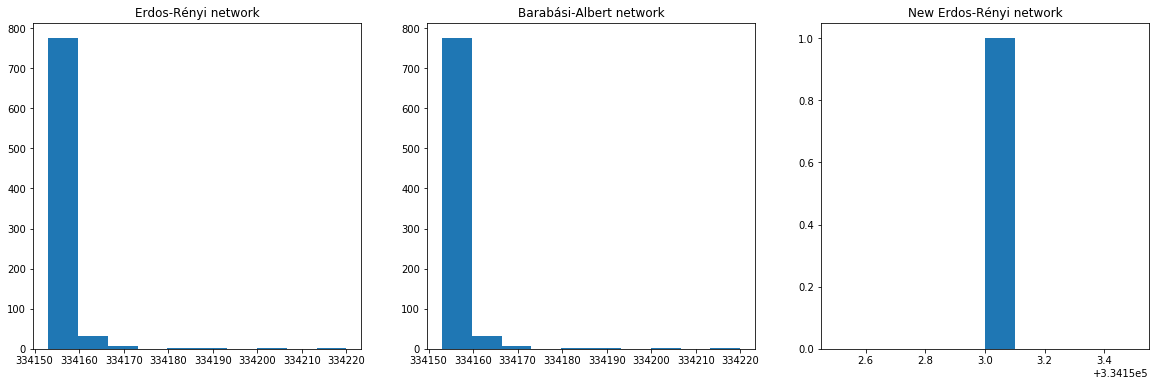

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].set_title("Erdos-Rényi network")
er_degrees = np.sum(G_er, axis=0) + np.sum(A_citation, axis=1)
axes[0].hist(er_degrees);
axes[1].set_title("Barabási-Albert network")
ba_degrees = np.sum(G_ba, axis=0) + np.sum(A_citation, axis=1)
axes[1].hist(ba_degrees);
axes[2].set_title("New Erdos-Rényi network")
er_new_degrees = np.sum(G_er_new, axis=0)
axes[2].hist(er_new_degrees);

In terms of the degree distribution, is there a good match between the citation and feature graphs and the simulated networks?
For the citation graph, choose one of the simulated networks above that match its degree distribution best. Indicate your preference below.

**Your answer here:** There is a good match between the shape of the distribution histogram of the citation graph and the two simulations of it. I would choose the first one, the only downside is that this simulation has a really high number of edges unlike the original graph.
The simulated feature graph does not have a good distribution match with the original one.

You can also simulate a network using the configuration model to match its degree disctribution exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).

Let us create another network to match the degree distribution of the feature graph. 

In [55]:
G_config = nx.configuration_model(feature_degrees) 
print("Configuration model has {} nodes and {} edges.".format(G_config.number_of_nodes(), G_config.size()))

Configuration model has 818 nodes and 136771 edges.


Does it mean that we create the same graph with the feature graph by the configuration model? If not, how do you understand that they are not the same?

**Your answer here:** No, because even if the degree distribution is the same, the number of edges per vertex may be very different.

### Question 7: Clustering Coefficient

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [56]:
nx.average_clustering(G_citation)

0.21693567980632222

In [57]:
nx.average_clustering(G_feature)

0.1220744470334593

What does the clustering coefficient tell us about a network? Comment on the values you obtain for the citation and feature graph.

**Your answer here:** The clustering coefficient is an indication about the fraction of the node's neighbors that are connected. 
The average clustering coefficient will tell us the average probability that two neighbors are connecded to each other in the entire graph, not only in different clusters

With that we conclude that the G_citation graph has a higher probability that two neighbors of a node link to each other in the entire graph, meaning is "more connected" than the G_feature graph

Now, let us check the average clustering coefficient for the simulated networks.

In [58]:
nx.average_clustering(G_er)

0.0017726161369193158

In [59]:
nx.average_clustering(G_ba)

0.9963385036195994

In [60]:
nx.average_clustering(nx.Graph(G_config))

0.45023668576149706

Comment on the values you obtain for the simulated networks. Is there any good match to the citation or feature graph in terms of clustering coefficient?

**Your answer here:**  No there is not a good match, the G_feature and G_citation are 0.122  and 0.216 respectively, however the G_er is 0.004 (much less than G_feature and G_citation), the G_ba is 0.996 (much more than G_feature and G_citation) and G_config is 0.45 more than twice G_citation and more than 4 times G_feature

Check the other [network model generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html) provided by NetworkX. Which one do you predict to have a better match to the citation graph or the feature graph in terms of degree distribution and clustering coefficient at the same time? Justify your answer.

**Your answer here:**

If you find a better fit, create a graph object below for that network model. Print the number of edges and the average clustering coefficient. Plot the histogram of the degree distribution.

To verify if there exists a better fit we will try all the different models that need the same parameters as the ones previously used:


In [61]:
possibilities = ["fast_gnp_random_graph", 
                 "gnp_random_graph",
                 "erdos_renyi_graph", 
                 "binomial_graph",
                 "duplication_divergence_graph"]
test_possibilities_avgclus = []
test_possibilities_avgclus.append(
    nx.average_clustering(nx.fast_gnp_random_graph(n, p))
)
test_possibilities_avgclus.append(
    nx.average_clustering(nx.gnp_random_graph(n, p))
)
test_possibilities_avgclus.append(
    nx.average_clustering(nx.erdos_renyi_graph(n, p))
)
test_possibilities_avgclus.append(
    nx.average_clustering(nx.binomial_graph(n, p))
)
test_possibilities_avgclus.append(
    nx.average_clustering(nx.duplication_divergence_graph(n, p))
)
test_possibilities_avgclus

[0.002730236348818256,
 0.002941747196025925,
 0.008219727840754736,
 0.001076958900919781,
 0.0]

In [62]:
# Now we will find the one with the smalles difference in 
# the clustering coef for each graph and then plot the histogram 
G_citation_fit =  []
for i in range(len(test_possibilities_avgclus)):
    G_citation_fit.append(nx.average_clustering(G_citation) - test_possibilities_avgclus[i])
G_citation_fit        

[0.21420544345750397,
 0.2139939326102963,
 0.2087159519655675,
 0.21585872090540245,
 0.21693567980632222]

**Your answer here:**
We can observe that the best fit for the clustering coef is the third option which is erdos_renyi_graph, therefore there is no better fit than the one previously used 

(array([775.,  32.,   6.,   0.,   2.,   1.,   0.,   1.,   0.,   1.]),
 array([334153. , 334159.7, 334166.4, 334173.1, 334179.8, 334186.5,
        334193.2, 334199.9, 334206.6, 334213.3, 334220. ]),
 <a list of 10 Patch objects>)

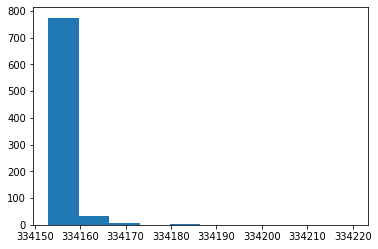

In [63]:
plt.hist(er_degrees)

In [64]:
G_feature_fit =  []
for i in range(len(test_possibilities_avgclus)):
    G_feature_fit.append(nx.average_clustering(G_feature) - test_possibilities_avgclus[i])
G_feature_fit    

[0.11934421068464104,
 0.11913269983743337,
 0.11385471919270455,
 0.12099748813253951,
 0.1220744470334593]

**Your answer here:**
We can observe that the best fit in the clustering coef is the third option which is erdos_renyi_graph, therefore there is no better fit than the one previously used 

(array([775.,  32.,   6.,   0.,   2.,   1.,   0.,   1.,   0.,   1.]),
 array([334153. , 334159.7, 334166.4, 334173.1, 334179.8, 334186.5,
        334193.2, 334199.9, 334206.6, 334213.3, 334220. ]),
 <a list of 10 Patch objects>)

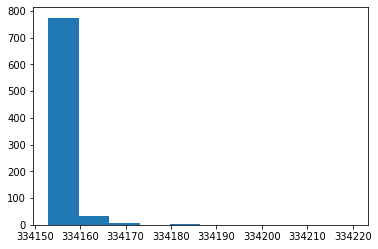

In [65]:
plt.hist(er_degrees)

In [66]:
nx.number_of_edges(nx.fast_gnp_random_graph(n, p))
test_possibilities_nbedges = []
test_possibilities_nbedges.append(
    nx.number_of_edges(nx.fast_gnp_random_graph(n, p))
)
test_possibilities_nbedges.append(
    nx.number_of_edges(nx.gnp_random_graph(n, p))
)
test_possibilities_nbedges.append
(nx.number_of_edges(nx.erdos_renyi_graph(n, p))
)
test_possibilities_nbedges.append(
    nx.number_of_edges(nx.binomial_graph(n, p))
)
test_possibilities_nbedges.append(
    nx.number_of_edges(nx.duplication_divergence_graph(n, p))
)
test_possibilities_nbedges

[1298, 1285, 1291, 820]

In [67]:
print("Number of edges in G_citation graph: ", nx.number_of_edges(G_citation))
print("Number of edges in G_feature graph: ", nx.number_of_edges(G_feature))


Number of edges in G_citation graph:  1175
Number of edges in G_feature graph:  1386


In [68]:
G_citation_fit_edges = []
for i in range(len(test_possibilities_nbedges)):
    G_citation_fit_edges.append(
        nx.number_of_edges(G_citation) - test_possibilities_nbedges[i]
    )
G_citation_fit_edges 

[-123, -110, -116, 355]

**Your answer here:**
We can observe that the best fit for the number of edges for the Citation Graph is the first option which is fast_gnp_random_graph

In [69]:
G_feature_fit_edges = []
for i in range(len(test_possibilities_nbedges)):
    G_feature_fit_edges.append(
        nx.number_of_edges(G_feature) - test_possibilities_nbedges[i]
    )
G_feature_fit_edges 

[88, 101, 95, 566]

**Your answer here:**
We can observe that the best fit for the number of edges for the G_Feature Graph is the second option which is gnp_random_graph